<a href="https://colab.research.google.com/github/DivyamJain0212/EDA-Model-Fertility2/blob/main/Divyam_Jain_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing the Libraries**

In [30]:
import pandas as pd
import numpy as np

### **Loading the DataSet**

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/Fertility2.csv')
df.head()

,rownames,morekids,gender1,gender2,age,afam,hispanic,other,work
0,1,no,female,female,35,no,no,no,40
1,2,no,female,male,33,no,no,no,52
2,3,no,female,female,28,no,no,no,12
3,4,no,male,male,28,no,no,no,0
4,5,no,female,male,31,no,no,no,0


### **Exploring Dimensions**

In [32]:
df.shape

(30000, 9)

In [33]:
df.describe()

,rownames,age,work
count,30000.000000,30000.000000,30000.000000
mean,15000.500000,30.354267,19.209500
std,8660.398374,3.383432,21.941018
min,1.000000,21.000000,0.000000
25%,7500.750000,28.000000,0.000000
50%,15000.500000,31.000000,6.000000
75%,22500.250000,33.000000,45.000000
max,30000.000000,35.000000,52.000000


In [34]:
df.dtypes

,0
rownames,int64
morekids,object
gender1,object
gender2,object
age,int64
afam,object
hispanic,object
other,object
work,int64


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rownames  30000 non-null  int64 
 1   morekids  30000 non-null  object
 2   gender1   30000 non-null  object
 3   gender2   30000 non-null  object
 4   age       30000 non-null  int64 
 5   afam      30000 non-null  object
 6   hispanic  30000 non-null  object
 7   other     30000 non-null  object
 8   work      30000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 2.1+ MB


Checking unique values in each columns of the data

In [36]:
for i in df.columns:
    print(df[i].unique())

[    1     2     3 ... 29998 29999 30000]
['no' 'yes']
['female' 'male']
['female' 'male']
[35 33 28 31 25 34 21 30 32 29 26 24 27 23 22]
['no' 'yes']
['no' 'yes']
['no' 'yes']
[40 52 12  0 20 37 35 44 50 10 26  2 36 49 23  8 46 45 18 38 15  4 14 24
 48  3  1 13 51 30 42  7 34  9 31 11 16 25  6 41 17 28 29 39 32 22 27  5
 21 33 19 47 43]


Checking if there are any duplicated rows in our dataset

In [37]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
29995,False
29996,False
29997,False
29998,False


In [38]:
duplicated_rows = df.duplicated().sum()
print("Total number of duplicated rows:",duplicated_rows)

Total number of duplicated rows: 0


Checking for missing data or null values

In [39]:
missing_val = df.isnull().sum().sum()
print("Total number of missing values are",missing_val)

Total number of missing values are 0


Discretization and binning of Data

In [43]:
#Creating a new column binning different age groups
age_labels = ['young', 'middle-aged', 'old']
df['age_group'] = pd.qcut(df['age'],3, labels=age_labels)
df.head()

,rownames,morekids,gender1,gender2,age,afam,hispanic,other,work,age_group
0,1,no,female,female,35,no,no,no,40,old
1,2,no,female,male,33,no,no,no,52,old
2,3,no,female,female,28,no,no,no,12,young
3,4,no,male,male,28,no,no,no,0,young
4,5,no,female,male,31,no,no,no,0,middle-aged


### **Univariate Analysis**

In [50]:
#importing the libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
#Descriptive Statistics
#Calculating the measure of central tendency of the age column.
mean = df['age'].mean()
median = df['age'].median()
mode = df['age'].mode()
print("Mean of age:",mean)
print("Median of age:",median)
print("Mode of age:",mode)

Mean of age: 30.354266666666668
Median of age: 31.0
Mode of age: 0    33
Name: age, dtype: int64


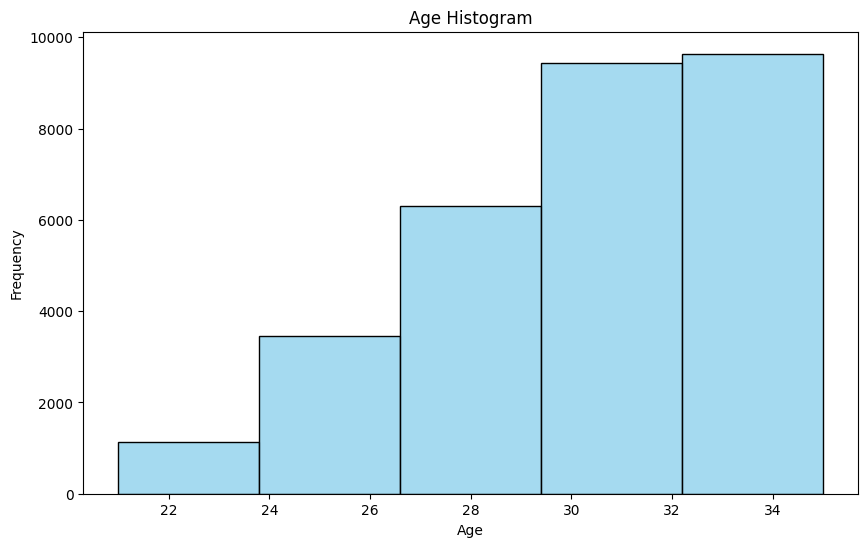

In [61]:
#Histogram of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'],bins=5, color='skyblue')
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

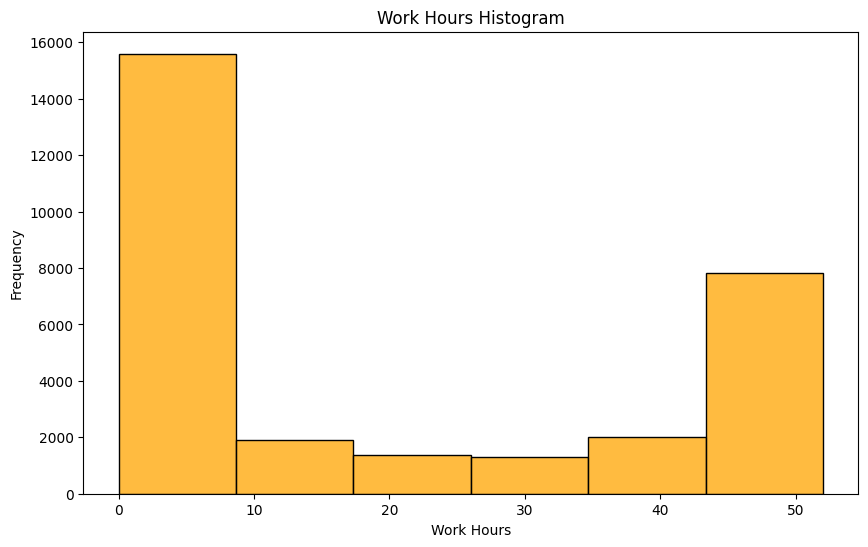

In [64]:
#Histogram of Word Hours
plt.figure(figsize=(10, 6))
sns.histplot(df['work'],bins=6, color='orange')
plt.title('Work Hours Histogram')
plt.xlabel('Work Hours')
plt.ylabel('Frequency')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


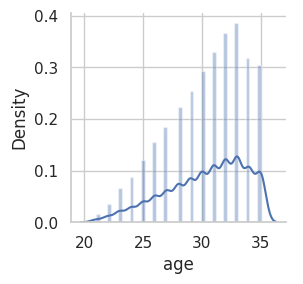

In [69]:
sns.FacetGrid(df).map(sns.distplot,'age').add_legend()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


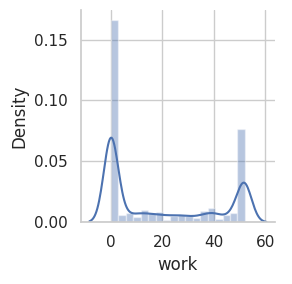

In [70]:
sns.FacetGrid(df).map(sns.distplot,'work').add_legend()


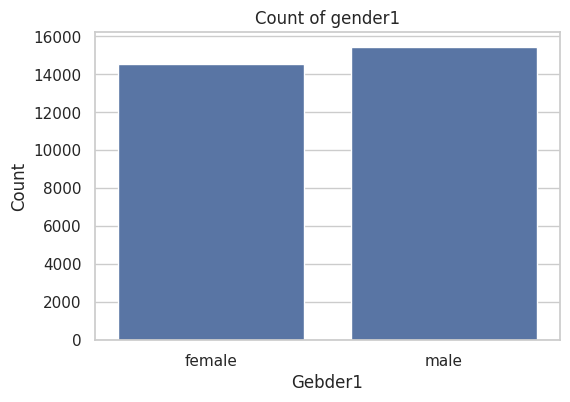

In [89]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender1', data=df)
plt.title('Count of gender1')
plt.xlabel('Gebder1')
plt.ylabel('Count')
plt.show()

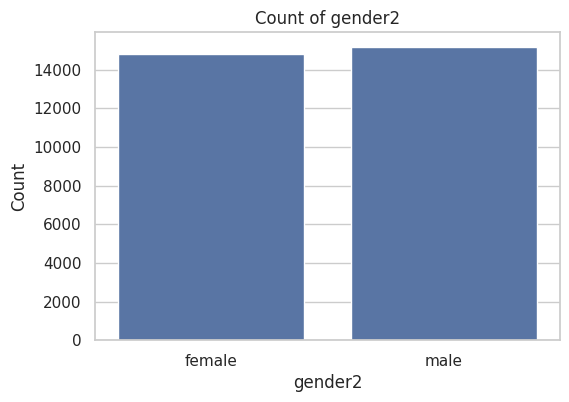

In [78]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender2', data=df)
plt.title('Count of gender2')
plt.xlabel('Gender2')
plt.ylabel('Count')
plt.show()

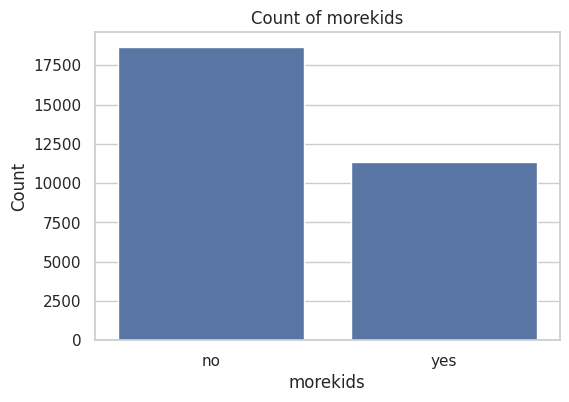

In [79]:
plt.figure(figsize=(6, 4))
sns.countplot(x='morekids', data=df)
plt.title('Count of morekids')
plt.xlabel('More Kids')
plt.ylabel('Count')
plt.show()

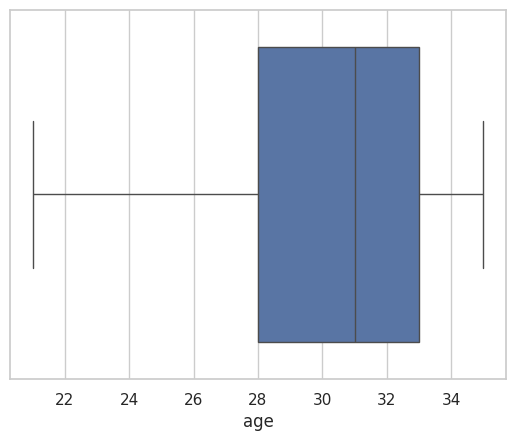

In [80]:
#Box Plots
sns.boxplot(x="age",data=df)
plt.show()

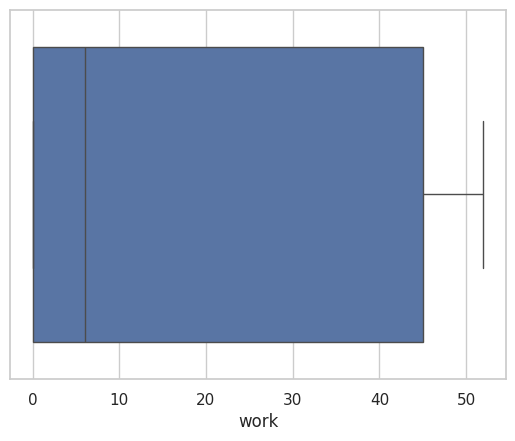

In [81]:
sns.boxplot(x="work",data=df)
plt.show()

NameError: name 'hispanic' is not defined

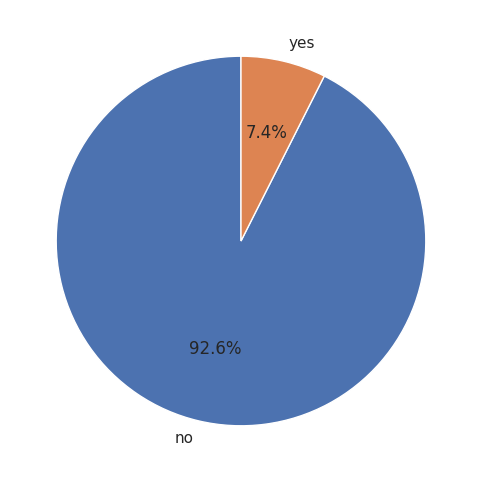

In [86]:
# frequency_counts = df['hispanic'].value_counts()
# plt.figure(figsize=(8, 6))
# plt.pie(frequency_counts, labels=frequency_counts.index, autopct='%1.1f%%', startangle=90)
# plt.title(f'Proportion of {hispanic}')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.show()

### **Bivariate Analysis**


Text(0, 0.5, 'Age')

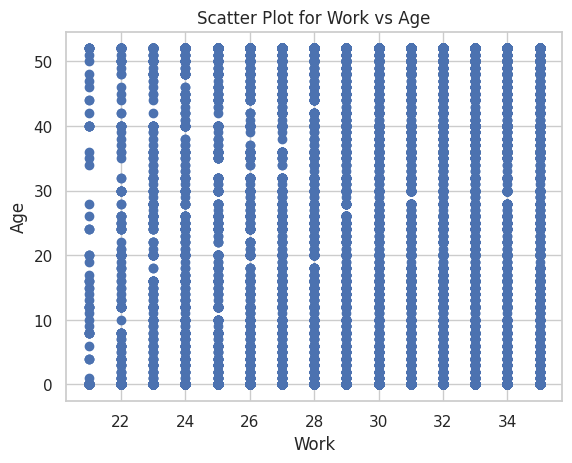

In [90]:
plt.scatter(df["age"], df["work"])
plt.title("Scatter Plot for Work vs Age")
plt.xlabel("Work")
plt.ylabel("Age")

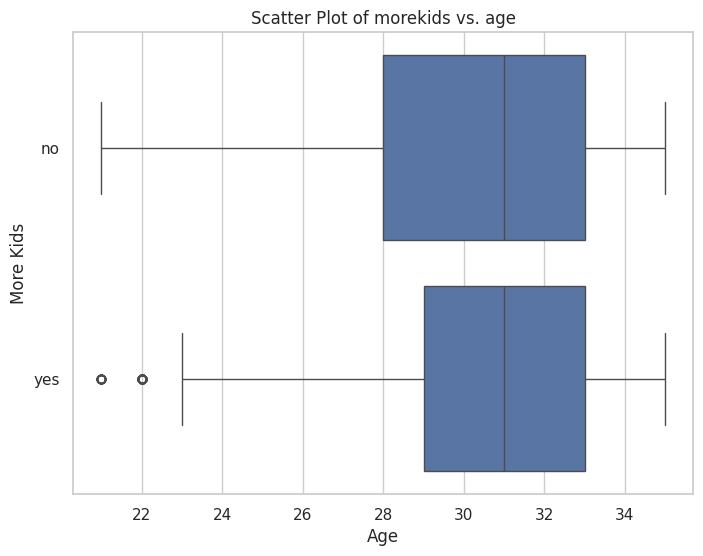

In [95]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='age', y='morekids', data=df)
plt.title('Scatter Plot of morekids vs. age')
plt.xlabel('Age')
plt.ylabel('More Kids')
plt.show()